In [20]:
from analysis import ModelAnalysis
from sklearn.tree import DecisionTreeRegressor
import numpy as np
np.random.seed(42)


In [21]:
# define models
# tree_default = DecisionTreeRegressor(random_state=42)
# tree_default_ms_4 = DecisionTreeRegressor(random_state=42, min_samples_split=4)
# tree_md_14 = DecisionTreeRegressor(random_state=42, max_depth=14)
# tree_md_16 = DecisionTreeRegressor(random_state=42, max_depth=16)
# tree_md_18 = DecisionTreeRegressor(random_state=42, max_depth=18)
# tree_md_20 = DecisionTreeRegressor(random_state=42, max_depth=20)
# tree_md_22 = DecisionTreeRegressor(random_state=42, max_depth=22)
# tree_md_18_ms_4 = DecisionTreeRegressor(random_state=42, max_depth=18,min_samples_split=4)

models = {}
models['tree_default'] = DecisionTreeRegressor(random_state=42)
for depth in [14,16,18,20,22,25]:
    for mss in [2,3,4,5,6,7]:
        models[f'tree_md_{depth}_ms_{mss}'] = DecisionTreeRegressor(random_state=42, max_depth=depth, min_samples_split=mss)

# best
best_tree = DecisionTreeRegressor(
    random_state=42,
    max_depth=18,
    min_samples_leaf=4
)
# ma = ModelAnalysis(models={
#     'tree_default': tree_default,
#     'tree_default_ms_4': tree_default_ms_4,
#     # 'tree_md_14': tree_md_14,
#     # 'tree_md_16': tree_md_16,
#     # 'tree_md_18': tree_md_18,
#     # 'tree_md_18_ms_4': tree_md_18_ms_4,
#     # 'tree_md_20': tree_md_20,
#     # 'tree_md_22': tree_md_22,
# })
best_model = {
    'default_tree': DecisionTreeRegressor(random_state=42),
    'tree_md_18_ms_4': best_tree
    }
ma = ModelAnalysis(models=models)# y='suicides_per_100k_pop')


In [22]:
ma.train()
_ = ma.predict(split='train')
_ = ma.predict(split='val')
_ = ma.predict(split='test')

Fitting default_tree
Fitting tree_md_18_ms_4


In [23]:
# ma.models['tree_default'].get_depth()

/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:117: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(pred_df, markers=True, alpha=.6,
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:121: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(pred_df[[k for k in self.models.keys() if k != 'Y']],
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:117: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(pred_df, markers=True, alpha=.6,
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:121: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(pred_df[[k for k in self.models.keys() if k != 'Y']],


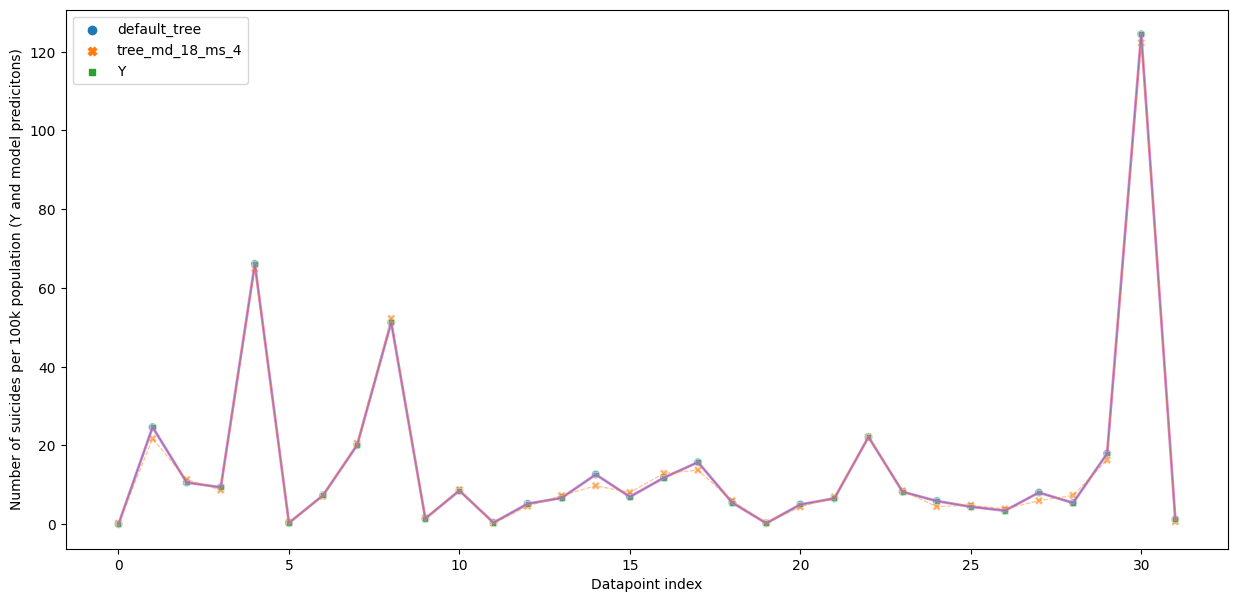

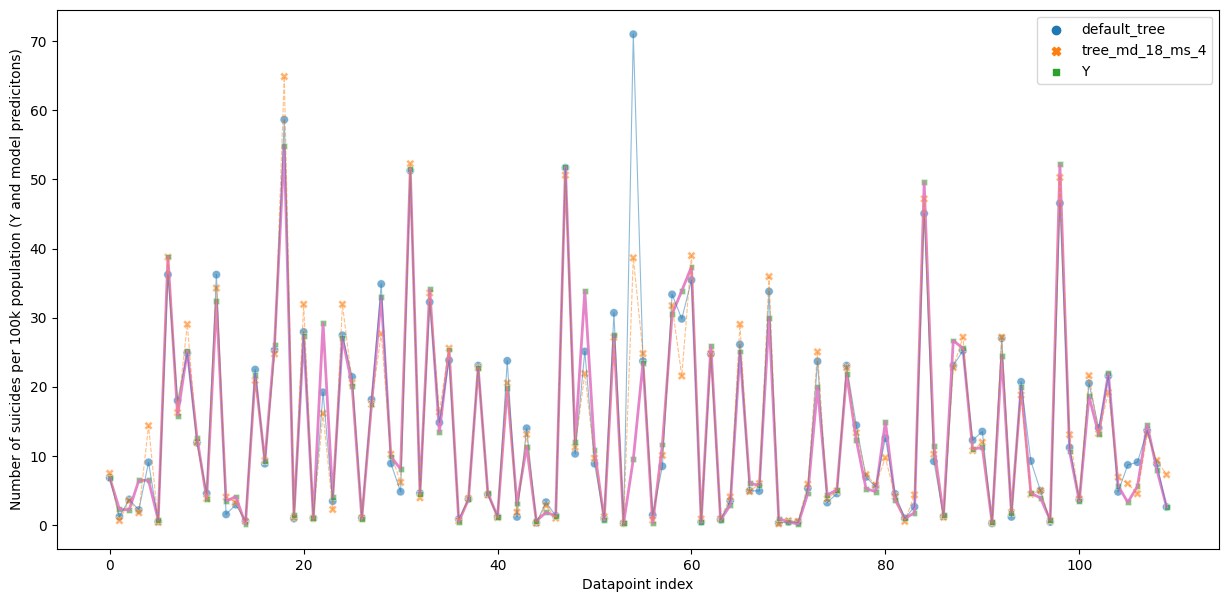

In [24]:
ma.visualize_predictions(split='train')
ma.visualize_predictions(split='val', sample_range=(0,110))

mean_squared_error
min: default_tree
             model      score
0     default_tree   0.000000
1  tree_md_18_ms_4  13.914676
r2_score
min: default_tree
             model     score
0     default_tree  1.000000
1  tree_md_18_ms_4  0.954532
max_error
min: default_tree
             model   score
0     default_tree   0.000
1  tree_md_18_ms_4  60.052
root_mean_squared_error
min: default_tree
             model     score
0     default_tree  0.000000
1  tree_md_18_ms_4  3.730238
mean_absolute_error
min: default_tree
             model     score
0     default_tree  0.000000
1  tree_md_18_ms_4  1.490774
VAL
mean_squared_error
min: tree_md_18_ms_4
             model      score
0     default_tree  26.122150
1  tree_md_18_ms_4  17.657351
r2_score
min: tree_md_18_ms_4
             model     score
0     default_tree  0.872585
1  tree_md_18_ms_4  0.913874
max_error
min: tree_md_18_ms_4
             model      score
0     default_tree  61.490000
1  tree_md_18_ms_4  29.133333
root_mean_squared_error


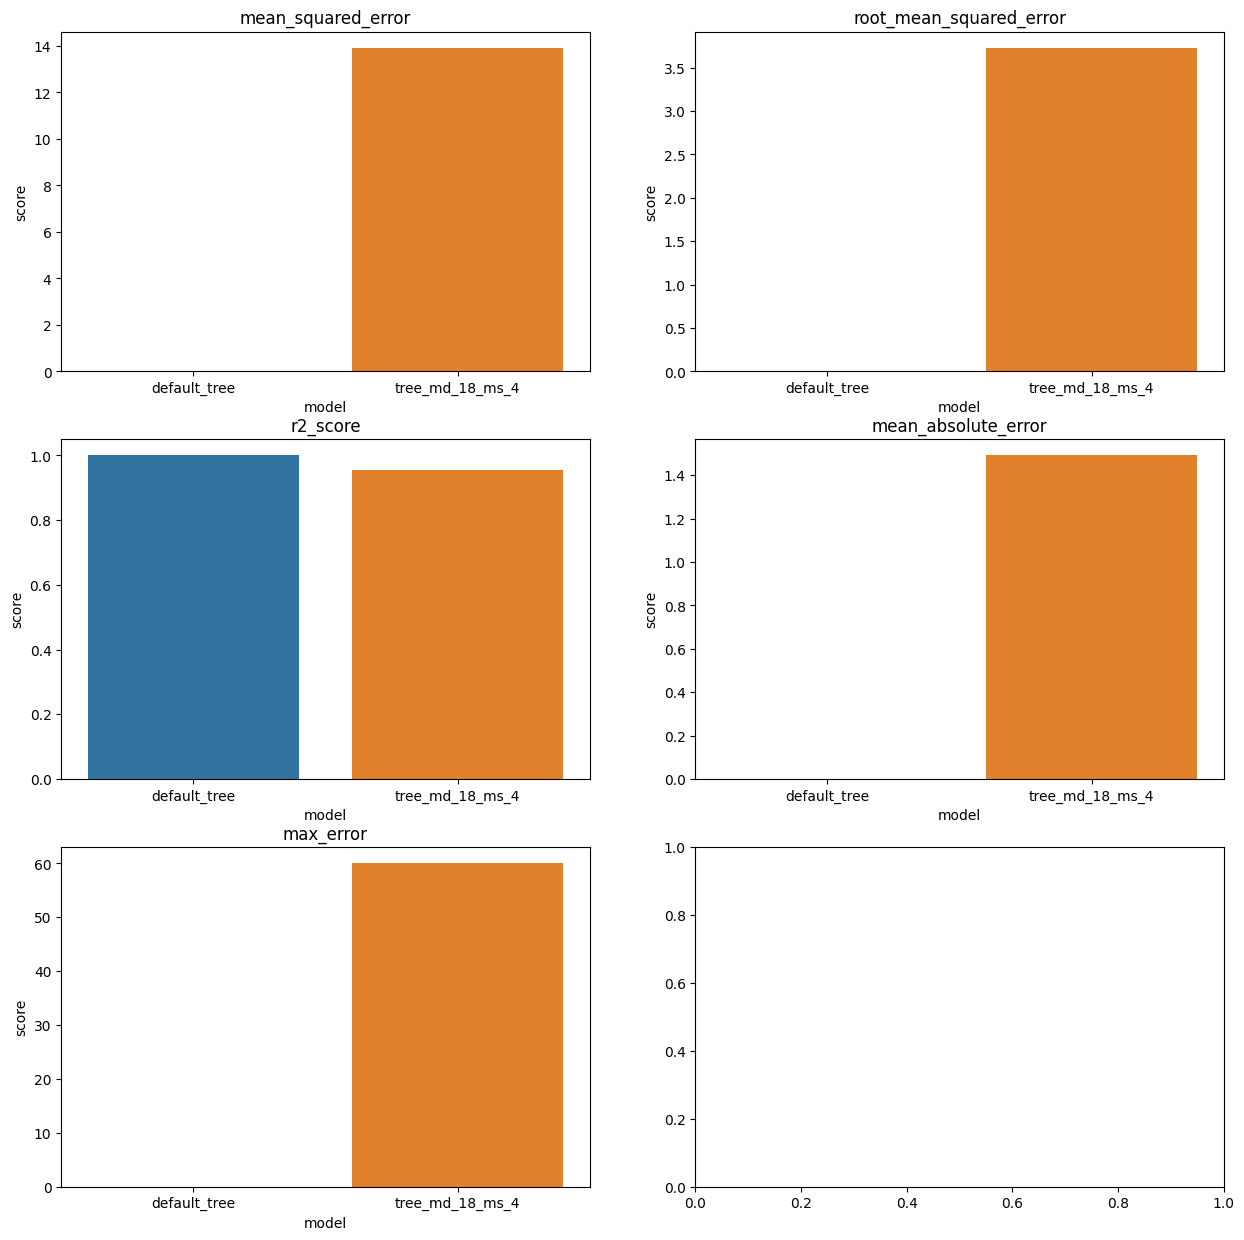

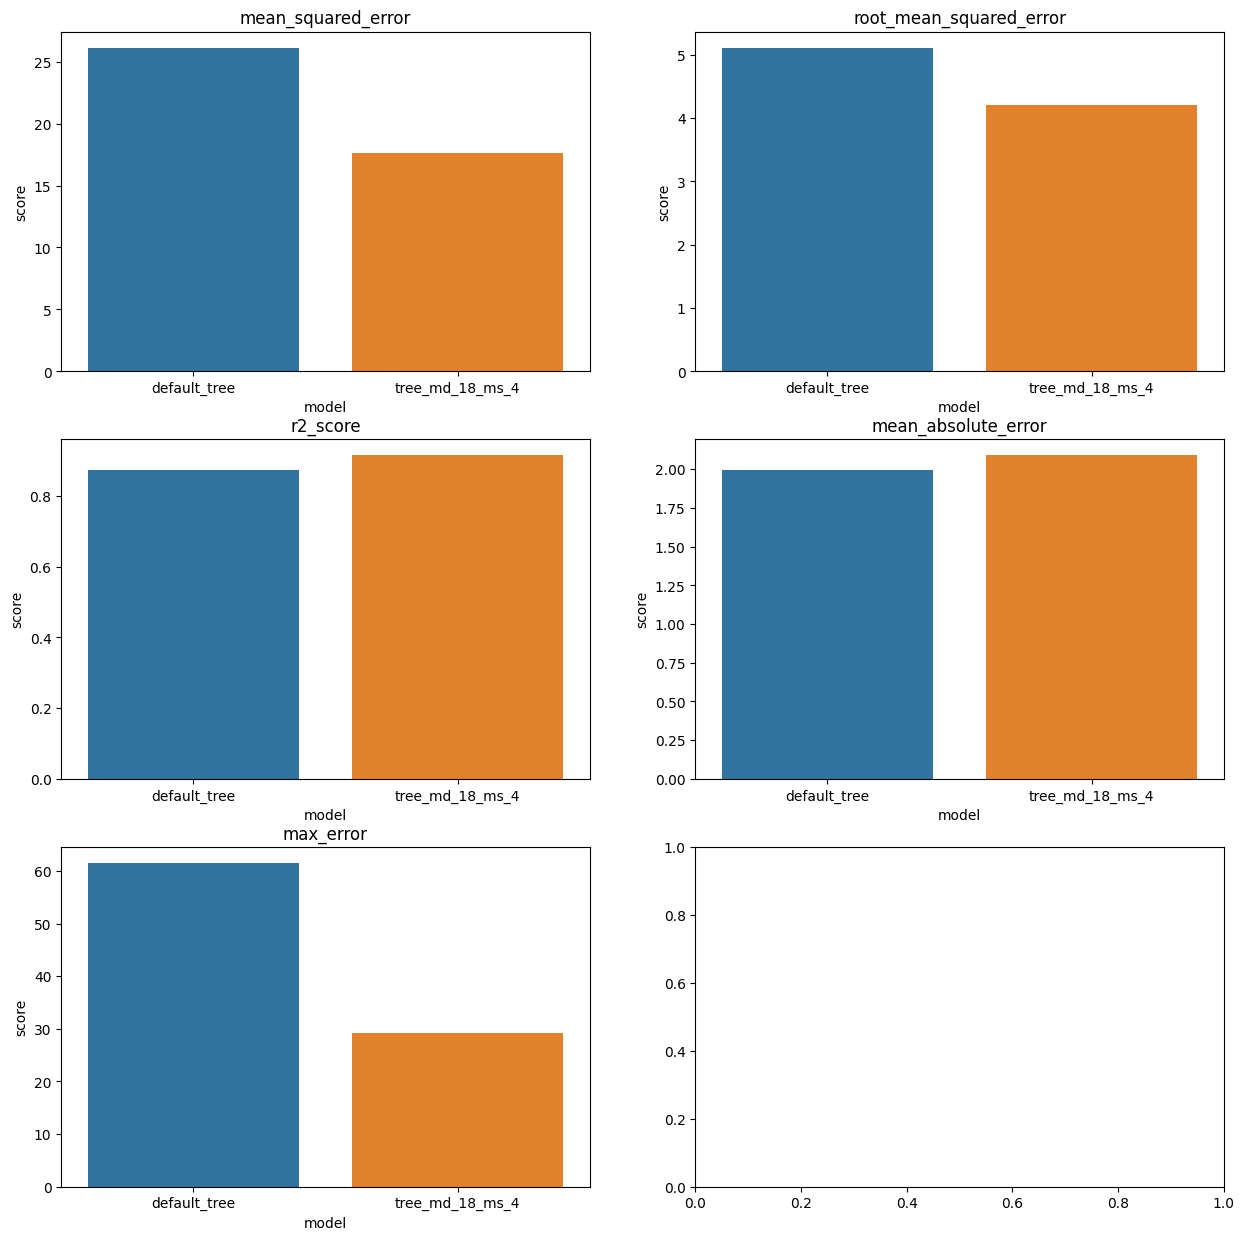

In [25]:
df = ma.visualize_metrics(split='train', verbose=True)

print(f"VAL")
df = ma.visualize_metrics(split='val', verbose=True)
# df = ma.visualize_metrics(split='train')

mean_squared_error
min: default_tree
             model      score
0     default_tree   0.000000
1  tree_md_18_ms_4  13.914676
r2_score
min: default_tree
             model     score
0     default_tree  1.000000
1  tree_md_18_ms_4  0.954532
max_error
min: default_tree
             model   score
0     default_tree   0.000
1  tree_md_18_ms_4  60.052
root_mean_squared_error
min: default_tree
             model     score
0     default_tree  0.000000
1  tree_md_18_ms_4  3.730238
mean_absolute_error
min: default_tree
             model     score
0     default_tree  0.000000
1  tree_md_18_ms_4  1.490774
VAL
mean_squared_error
min: tree_md_18_ms_4
             model      score
0     default_tree  26.122150
1  tree_md_18_ms_4  17.657351
r2_score
min: tree_md_18_ms_4
             model     score
0     default_tree  0.872585
1  tree_md_18_ms_4  0.913874
max_error
min: tree_md_18_ms_4
             model      score
0     default_tree  61.490000
1  tree_md_18_ms_4  29.133333
root_mean_squared_error


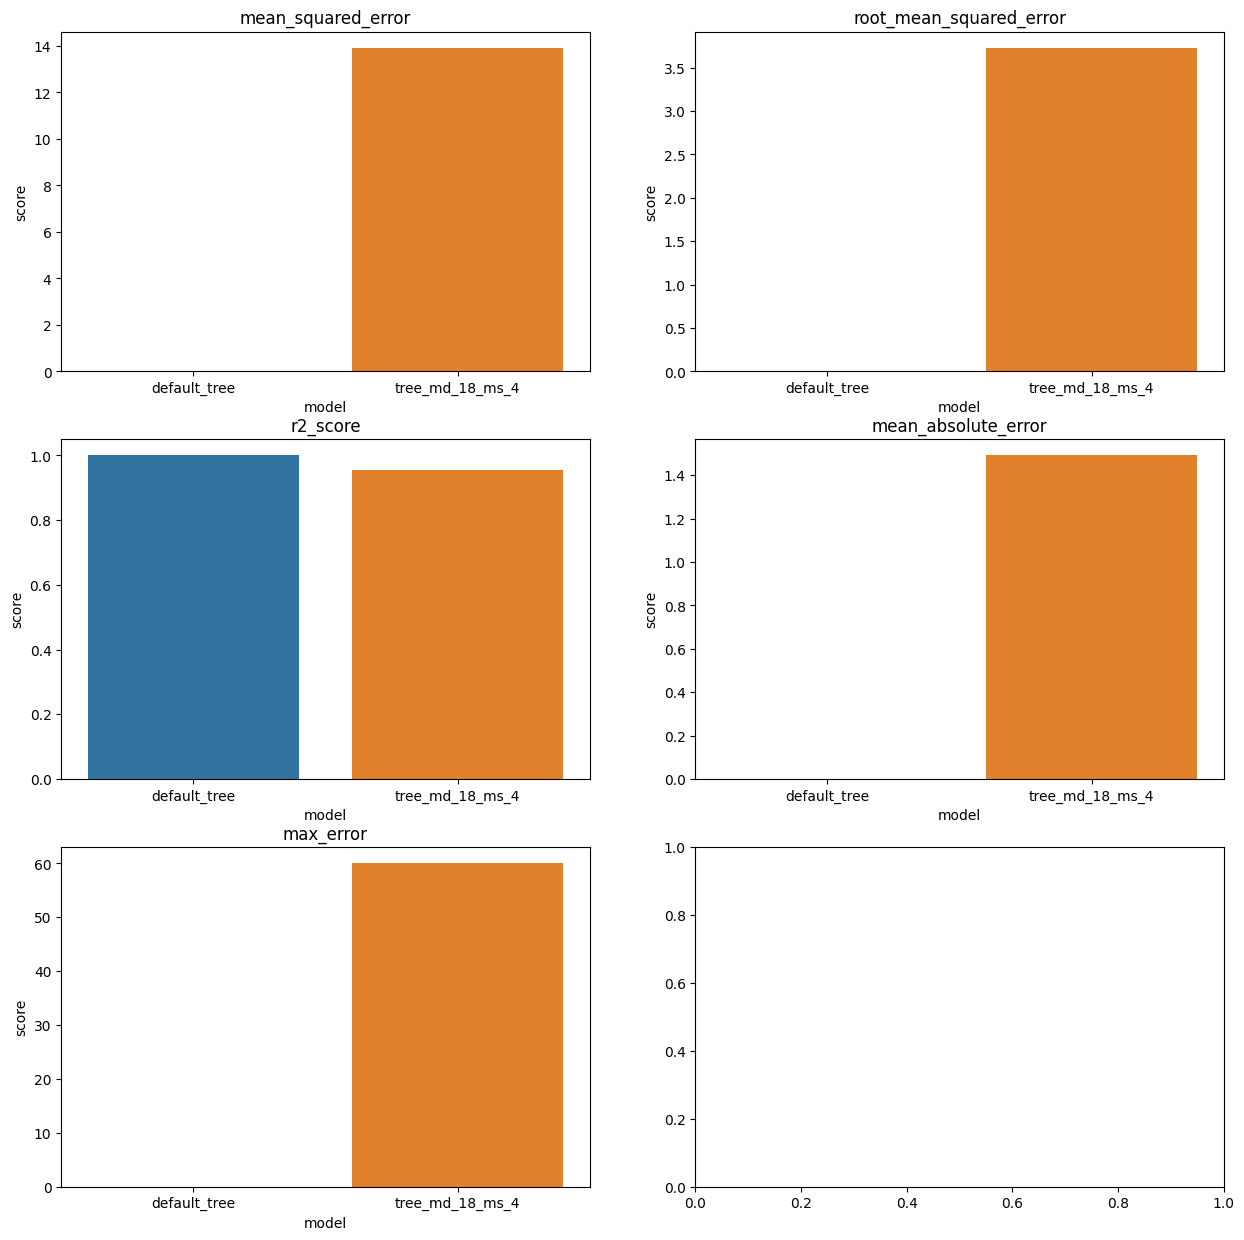

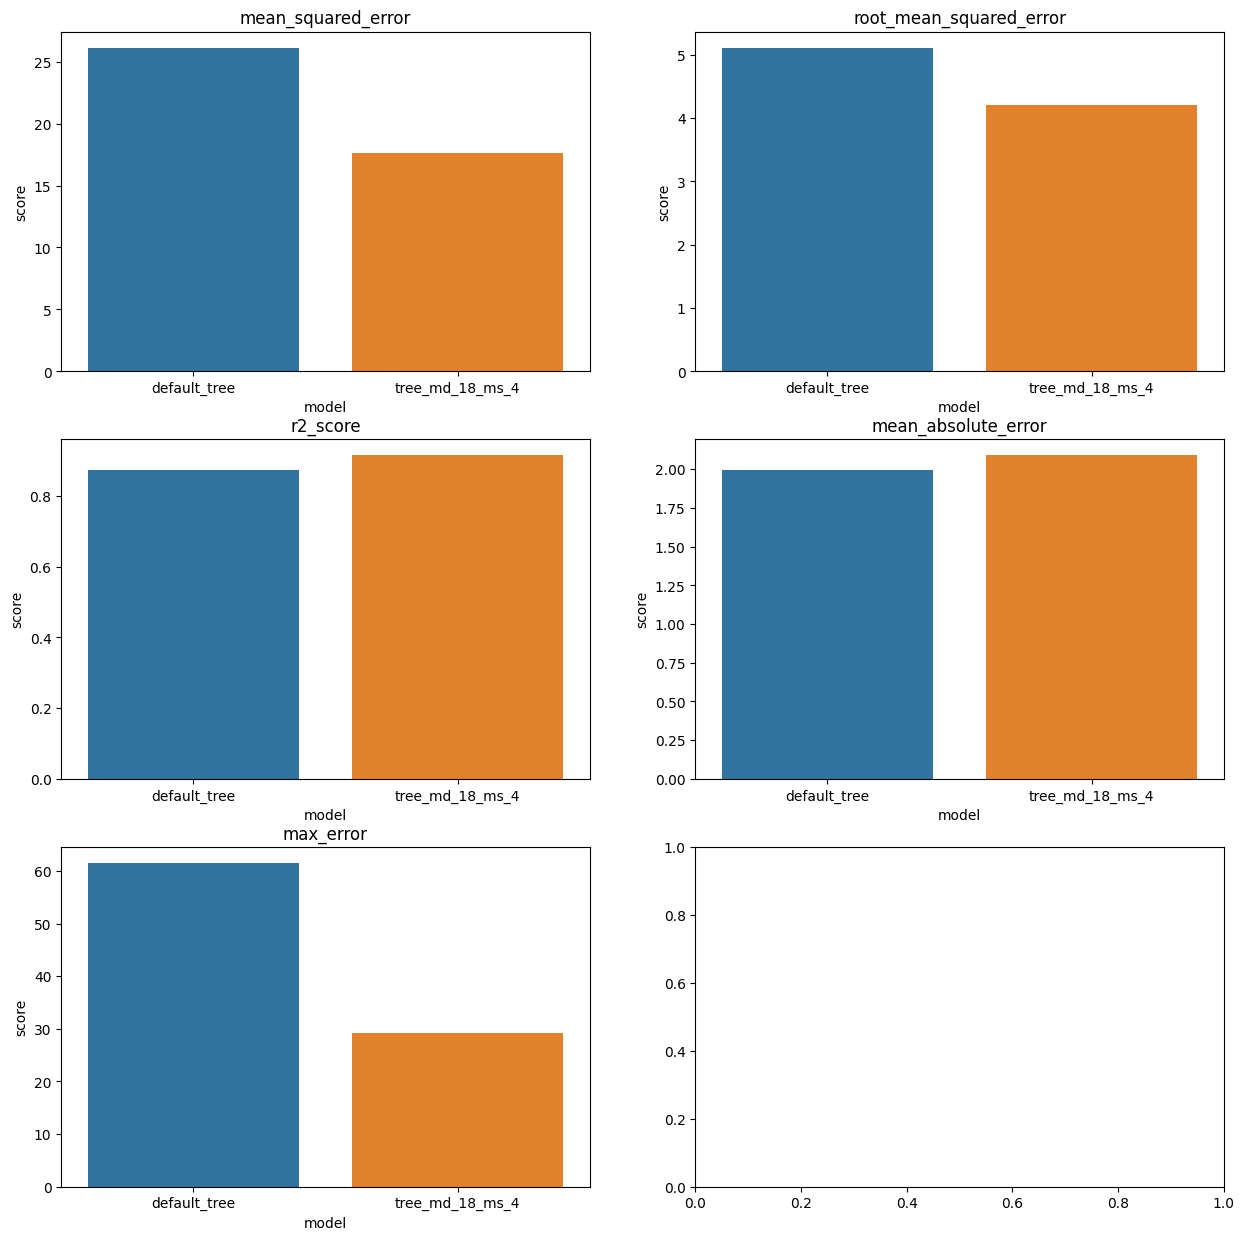

In [ ]:
df = ma.visualize_metrics(split='train', verbose=True)

print(f"VAL")
df = ma.visualize_metrics(split='val', verbose=True)
# df = ma.visualize_metrics(split='train')

In [26]:
# save models
ma.save_models(base_path="models/tree")